In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import skew
%matplotlib inline
rcParams['figure.figsize'] = (12.0, 6.0)

df_data = pd.read_excel('DATA.xlsx')
# df_train = pd.read_excel( "train.xlsx" )
# df_test = pd.read_excel( "test.xlsx" )

In [2]:
# print(f"train shape : {df_train.shape}")
# print(f" test shape : {df_test.shape}")

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4064 entries, 0 to 4063
Data columns (total 16 columns):
time_datetime         4064 non-null datetime64[ns]
FinenessGoal          4064 non-null int64
Fineness              4063 non-null float64
值班人員                  4023 non-null object
Class                 4023 non-null object
4線-總飼料量(t/h)          4064 non-null float64
4線磨機主馬達電流(A)          4064 non-null float64
磨機效率                  3568 non-null float64
4線磨機磨輪加壓壓力(kg/cm2)    4064 non-null float64
4線三明治尾輪加水設定(%)        4064 non-null float64
4線三明治尾輪加水流量(m3/h)     4064 non-null float64
4線選粉機轉速(rmp)          4064 non-null float64
4線-大風車入口閥開度           4064 non-null float64
4線磨機出口負壓(mmAq)        4064 non-null float64
4線外循環提運機電流(A)         4064 non-null float64
4線磨機振動值(um)           4064 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(2)
memory usage: 508.1+ KB


## Five Number Summary

In [5]:
## 將資料根據細度設定值與班別分群
df_data=df_data.loc[(df_data["FinenessGoal"] == 4200)]
df_data=df_data.loc[(df_data["Class"] == 'E')]
df_data.head()

,time_datetime,FinenessGoal,Fineness,值班人員,Class,4線-總飼料量(t/h),4線磨機主馬達電流(A),磨機效率,4線磨機磨輪加壓壓力(kg/cm2),4線三明治尾輪加水設定(%),4線三明治尾輪加水流量(m3/h),4線選粉機轉速(rmp),4線-大風車入口閥開度,4線磨機出口負壓(mmAq),4線外循環提運機電流(A),4線磨機振動值(um)
4,2019-12-30 07:30:00,4200,4296.0,葉至統,E,69.0,152.1,2.204348,87.7,28.7,0.6,656.0,68.7,-319.3,9.6,14.7
5,2019-12-30 09:30:00,4200,4116.0,葉至統,E,68.4,161.4,2.359649,86.8,22.1,0.4,660.7,68.7,-328.0,9.8,18.8
6,2019-12-30 11:30:00,4200,4296.0,葉至統,E,68.7,163.8,2.384279,87.8,22.0,0.4,669.5,68.5,-307.7,9.5,16.4
7,2019-12-30 13:30:00,4200,4237.0,葉至統,E,60.0,144.1,2.401667,88.0,22.1,0.4,661.0,68.6,-301.4,9.4,20.4
16,2019-12-29 07:30:00,4200,4129.0,葉至統,E,67.3,151.5,2.251114,84.2,12.6,0.0,683.8,68.3,-303.2,9.6,17.8


In [6]:
# 描述data數值型態的統計資訊（個數、平均、標準差、最小值、
#                           第一四分位數、第二四分位數、第三四分位數
#                           、最大值）
# print(f"numerical feature: {df_train.describe().shape}")
print(f" data shape : {df_data.shape}")
df_data.describe()

 data shape : (524, 16)


,FinenessGoal,Fineness,4線-總飼料量(t/h),4線磨機主馬達電流(A),磨機效率,4線磨機磨輪加壓壓力(kg/cm2),4線三明治尾輪加水設定(%),4線三明治尾輪加水流量(m3/h),4線選粉機轉速(rmp),4線-大風車入口閥開度,4線磨機出口負壓(mmAq),4線外循環提運機電流(A),4線磨機振動值(um)
count,524.0,524.000000,524.000000,524.000000,520.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.000000,524.00000,524.000000
mean,4200.0,4197.270992,65.418893,144.694084,2.212711,83.792748,23.388931,0.407824,681.919847,67.719847,-296.712214,9.50229,15.575573
std,0.0,57.733407,7.239717,19.283380,0.203342,5.943924,12.906088,0.342351,48.130542,4.760632,21.711605,0.60292,3.662159
min,4200.0,4109.000000,0.000000,0.200000,0.269142,1.400000,0.000000,0.000000,0.000000,2.000000,-328.000000,0.00000,0.200000
25%,4200.0,4144.000000,65.400000,137.475000,2.101839,82.500000,12.600000,0.000000,673.000000,67.700000,-304.400000,9.50000,13.200000
50%,4200.0,4190.000000,67.500000,147.700000,2.229416,85.400000,23.400000,0.400000,683.800000,68.500000,-299.800000,9.50000,15.100000
75%,4200.0,4236.000000,68.400000,155.625000,2.336219,86.825000,33.000000,0.600000,694.775000,69.400000,-291.800000,9.60000,17.800000
max,4200.0,4296.000000,71.200000,174.200000,3.313953,98.500000,71.400000,1.800000,791.100000,71.600000,-3.600000,10.30000,26.100000


## Class分群

In [8]:
#篩選一些由分布圖觀察到之離群值
df_data = df_data.drop( labels = df_data[ df_data['4線磨機磨輪加壓壓力(kg/cm2)'] < 60 ].index, axis = 0 )
df_data = df_data.drop( labels = df_data[ df_data['4線選粉機轉速(rmp)'] < 450 ].index, axis = 0 )
df_data = df_data.drop( labels = df_data[ df_data['4線-大風車入口閥開度'] < 50 ].index, axis = 0 )
df_data = df_data.drop( labels = df_data[ df_data['4線磨機出口負壓(mmAq)'] > -150 ].index, axis = 0 )
df_data = df_data.drop( labels = df_data[ df_data['4線-總飼料量(t/h)'] < 50 ].index, axis = 0 )
df_data = df_data.drop( labels = df_data[ df_data['4線外循環提運機電流(A)'] > 10 ].index, axis = 0 )
df_data = df_data.drop( labels = df_data[ df_data['4線磨機振動值(um)'] > 30 ].index, axis = 0 )


In [9]:
df_Agrade=df_data.loc[(df_data["Fineness"] > 4150) & (df_data["Fineness"] < 4250) ]
df_B1grade=df_data.loc[(df_data["Fineness"] < 4150)]
df_B2grade=df_data.loc[(df_data["Fineness"] > 4250) ]

In [ ]:
df_Agrade.head()

In [16]:
df_Agrade.describe()

,FinenessGoal,Fineness,4線-總飼料量(t/h),4線磨機主馬達電流(A),磨機效率,4線磨機磨輪加壓壓力(kg/cm2),4線三明治尾輪加水設定(%),4線三明治尾輪加水流量(m3/h),4線選粉機轉速(rmp),4線-大風車入口閥開度,4線磨機出口負壓(mmAq),4線外循環提運機電流(A),4線磨機振動值(um)
count,265.0,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,4200.0,4195.962264,66.267547,146.595849,2.214557,84.085660,23.164528,0.408679,686.301132,68.071698,-298.598491,9.544528,15.735849
std,0.0,26.703877,3.739531,12.986077,0.183706,4.548104,12.959600,0.340399,18.403714,2.160280,9.428880,0.117978,3.238037
min,4200.0,4157.000000,50.100000,96.900000,1.667651,65.400000,2.000000,0.000000,642.500000,52.600000,-325.500000,9.200000,10.000000
25%,4200.0,4175.000000,65.800000,138.400000,2.092537,83.300000,12.600000,0.000000,675.300000,67.700000,-303.900000,9.500000,13.300000
50%,4200.0,4190.000000,67.600000,148.100000,2.231966,85.600000,23.300000,0.400000,685.900000,68.500000,-300.300000,9.600000,15.400000
75%,4200.0,4221.000000,68.400000,156.000000,2.345588,86.800000,33.000000,0.600000,695.600000,69.400000,-292.500000,9.600000,17.900000
max,4200.0,4237.000000,71.200000,174.200000,2.928440,94.300000,71.400000,1.800000,791.100000,71.600000,-272.800000,10.000000,25.200000


In [17]:
df_B1grade.describe()

,FinenessGoal,Fineness,4線-總飼料量(t/h),4線磨機主馬達電流(A),磨機效率,4線磨機磨輪加壓壓力(kg/cm2),4線三明治尾輪加水設定(%),4線三明治尾輪加水流量(m3/h),4線選粉機轉速(rmp),4線-大風車入口閥開度,4線磨機出口負壓(mmAq),4線外循環提運機電流(A),4線磨機振動值(um)
count,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,4200.0,4126.184615,65.873846,145.805385,2.215688,84.143846,23.092308,0.412308,684.753077,67.978462,-298.553077,9.529231,15.994615
std,0.0,14.139825,4.150382,13.196443,0.174781,4.612168,13.458651,0.355252,20.603105,2.418565,10.349866,0.132036,3.722617
min,4200.0,4109.000000,53.400000,97.000000,1.747748,70.500000,1.900000,0.000000,648.400000,56.200000,-328.000000,9.000000,9.800000
25%,4200.0,4113.000000,64.500000,136.200000,2.108276,82.575000,10.825000,0.000000,670.825000,67.700000,-304.800000,9.500000,13.200000
50%,4200.0,4122.500000,67.500000,146.650000,2.229270,85.650000,22.400000,0.400000,682.400000,68.600000,-300.350000,9.500000,15.250000
75%,4200.0,4144.000000,68.400000,156.575000,2.338695,87.075000,31.375000,0.600000,695.000000,69.300000,-293.075000,9.600000,17.875000
max,4200.0,4144.000000,71.200000,172.300000,2.642857,92.600000,57.600000,1.400000,778.800000,70.800000,-265.800000,9.800000,26.100000


In [18]:
df_B2grade.describe()

,FinenessGoal,Fineness,4線-總飼料量(t/h),4線磨機主馬達電流(A),磨機效率,4線磨機磨輪加壓壓力(kg/cm2),4線三明治尾輪加水設定(%),4線三明治尾輪加水流量(m3/h),4線選粉機轉速(rmp),4線-大風車入口閥開度,4線磨機出口負壓(mmAq),4線外循環提運機電流(A),4線磨機振動值(um)
count,119.0,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,4200.0,4279.605042,66.175630,146.566387,2.216651,83.355462,24.536134,0.431092,685.669748,67.939496,-298.010924,9.521849,15.434454
std,0.0,17.889595,3.995929,12.796956,0.165152,4.829880,12.313089,0.330061,17.096756,2.368373,10.233310,0.123618,3.157838
min,4200.0,4251.000000,54.500000,110.200000,1.657143,70.700000,2.100000,0.000000,649.000000,60.100000,-319.300000,9.200000,10.100000
25%,4200.0,4266.000000,65.750000,140.250000,2.119496,81.850000,15.300000,0.100000,674.900000,67.700000,-305.300000,9.400000,13.100000
50%,4200.0,4281.000000,67.600000,148.400000,2.229299,84.900000,24.100000,0.400000,684.700000,68.500000,-299.000000,9.500000,15.000000
75%,4200.0,4296.000000,68.550000,155.150000,2.315324,86.550000,34.900000,0.600000,693.500000,69.400000,-291.900000,9.600000,17.300000
max,4200.0,4296.000000,70.800000,173.300000,2.578869,89.200000,52.200000,1.300000,723.700000,70.600000,-263.200000,9.800000,24.700000


## 利用Histogram比較分佈

In [11]:
#取得數值型態的欄位
numeric_data = df_Agrade._get_numeric_data()
numeric_data.columns

Index(['FinenessGoal', 'Fineness', '4線-總飼料量(t/h)', '4線磨機主馬達電流(A)', '磨機效率',
       '4線磨機磨輪加壓壓力(kg/cm2)', '4線三明治尾輪加水設定(%)', '4線三明治尾輪加水流量(m3/h)',
       '4線選粉機轉速(rmp)', '4線-大風車入口閥開度', '4線磨機出口負壓(mmAq)', '4線外循環提運機電流(A)',
       '4線磨機振動值(um)'],
      dtype='object')

there are FinenessGoal


C:\Users\06006637\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\06006637\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\06006637\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


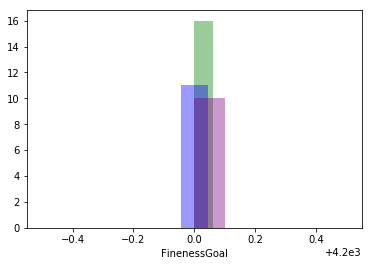

there are Fineness


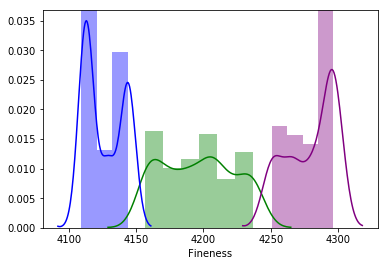

there are 4線-總飼料量(t/h)


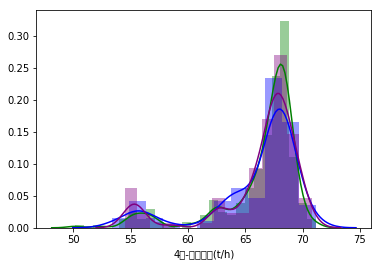

there are 4線磨機主馬達電流(A)


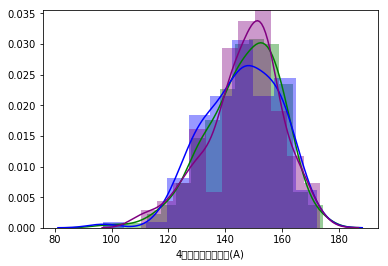

there are 磨機效率


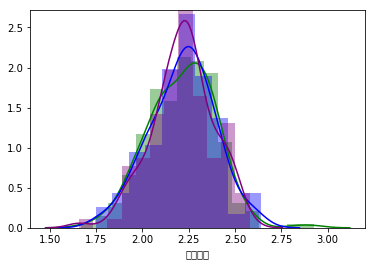

there are 4線磨機磨輪加壓壓力(kg/cm2)


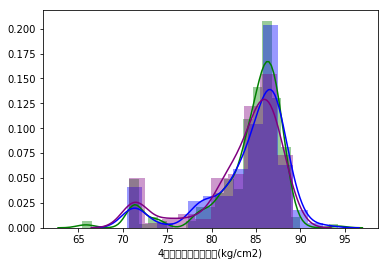

there are 4線三明治尾輪加水設定(%)


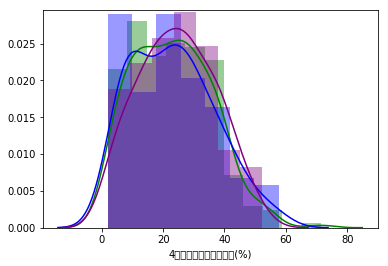

there are 4線三明治尾輪加水流量(m3/h)


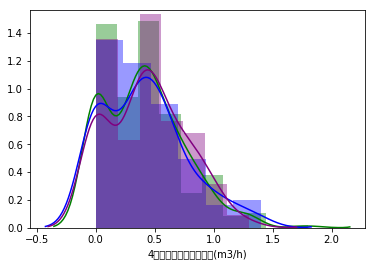

there are 4線選粉機轉速(rmp)


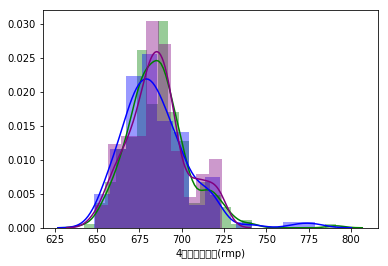

there are 4線-大風車入口閥開度


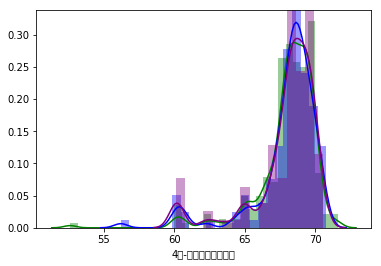

there are 4線磨機出口負壓(mmAq)


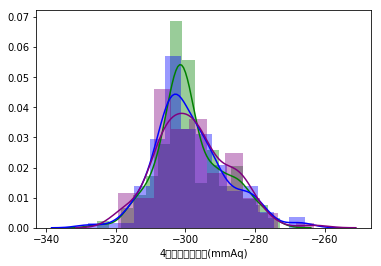

there are 4線外循環提運機電流(A)


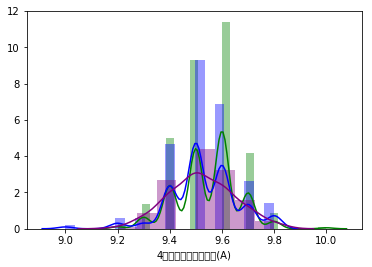

there are 4線磨機振動值(um)


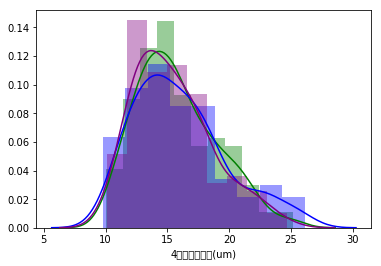

In [12]:
# drop掉每個欄位的NA值並劃出其分布
for i in numeric_data:
    
#     temp1 = df_Agrade[i].dropna()  ##df_train[i].dropna()會將i欄位底下之Na值drop掉
#     temp2 = df_B1grade[j].dropna()
#     temp3 = df_B2grade[k].dropna()
    
    print(f"there are {i}")
    sns.distplot(df_Agrade[i],color='green') 
    sns.distplot(df_B1grade[i],color='blue')
    sns.distplot(df_B2grade[i],color='purple')
#     sns.distplot(df_Eclass[i],color='red')
#     sns.distplot(df_Fclass[i],color='gold')
    plt.show()

## 進一步依細度值 標準差分群

In [5]:
# df_Agrade=df_data.loc[(df_data["Fineness"] > 4150) & (df_data["Fineness"] < 4250) ]
# df_B1grade=df_data.loc[(df_data["Fineness"] < 4150)]
# df_B2grade=df_data.loc[(df_data["Fineness"] > 4250) ]

In [6]:
# df_Agrade.head()

,time_datetime,FinenessGoal,Fineness,值班人員,Class,4線磨機磨輪加壓壓力(kg/cm2),4線三明治尾輪加水設定(%),4線三明治尾輪加水流量(m3/h),4線選粉機轉速(rmp),4線-大風車入口閥開度,4線磨機出口負壓(mmAq)
0,2019-12-30 23:30:00,4200,4175.0,王瑋溫,A,88.2,13.9,0.3,654.5,68.8,-305.0
2,2019-12-30 03:30:00,4200,4160.0,王瑋溫,A,87.8,23.4,0.5,667.7,68.6,-318.3
3,2019-12-30 05:30:00,4200,4206.0,王瑋溫,A,88.8,23.4,0.4,667.1,68.5,-320.7
7,2019-12-30 13:30:00,4200,4237.0,葉至統,E,88.0,22.1,0.4,661.0,68.6,-301.4
8,2019-12-30 15:30:00,4200,4192.0,邱耀儀,C,86.3,28.7,0.6,651.9,68.5,-296.9


In [7]:
# df_B2grade.head()

,time_datetime,FinenessGoal,Fineness,值班人員,Class,4線磨機磨輪加壓壓力(kg/cm2),4線三明治尾輪加水設定(%),4線三明治尾輪加水流量(m3/h),4線選粉機轉速(rmp),4線-大風車入口閥開度,4線磨機出口負壓(mmAq)
1,2019-12-30 01:30:00,4200,4251.0,王瑋溫,A,87.1,23.3,0.5,675.3,68.4,-315.7
4,2019-12-30 07:30:00,4200,4296.0,葉至統,E,87.7,28.7,0.6,656.0,68.7,-319.3
6,2019-12-30 11:30:00,4200,4296.0,葉至統,E,87.8,22.0,0.4,669.5,68.5,-307.7
11,2019-12-30 21:30:00,4200,4266.0,邱耀儀,C,87.6,8.6,0.0,657.2,68.4,-302.9
19,2019-12-29 13:30:00,4200,4281.0,葉至統,E,86.4,24.4,0.5,685.3,68.9,-304.3


## Scatterplot

In [4]:
# df_data = df_data.drop( labels = df_data[ df_data.Fineness < 3000 ].index, axis = 0 )

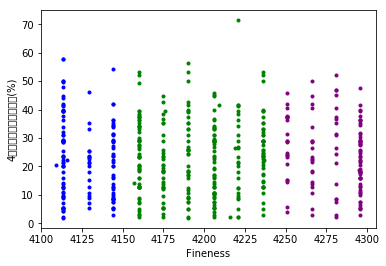

In [20]:
plt.plot(df_Agrade['Fineness'] ,df_Agrade['4線三明治尾輪加水設定(%)'], '.',color ='green' )
plt.plot(df_B1grade['Fineness'] ,df_B1grade['4線三明治尾輪加水設定(%)'], '.',color ='blue' )
plt.plot(df_B2grade['Fineness'] ,df_B2grade['4線三明治尾輪加水設定(%)'], '.',color ='purple' )
plt.xlabel('Fineness')
plt.ylabel('4線三明治尾輪加水設定(%)')
plt.show()

In [8]:
#取得數值型態的欄位
numeric_data = df_data._get_numeric_data()
numeric_data.columns

Index(['FinenessGoal', 'Fineness', '4線磨機磨輪加壓壓力(kg/cm2)', '4線三明治尾輪加水設定(%)',
       '4線三明治尾輪加水流量(m3/h)', '4線選粉機轉速(rmp)', '4線-大風車入口閥開度', '4線磨機出口負壓(mmAq)'],
      dtype='object')

there are FinenessGoal


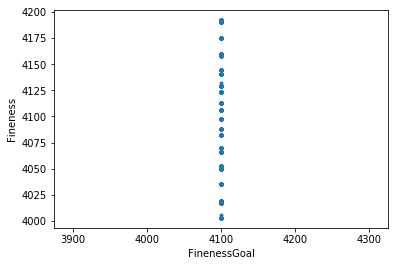

there are Fineness


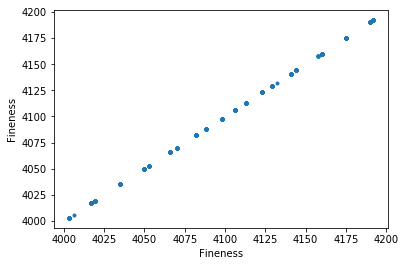

there are 4線磨機磨輪加壓壓力(kg/cm2)


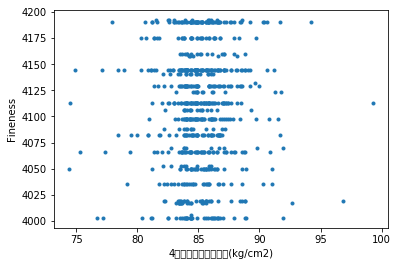

there are 4線三明治尾輪加水設定(%)


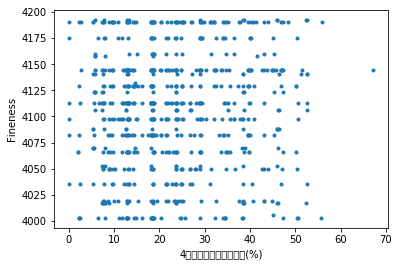

there are 4線三明治尾輪加水流量(m3/h)


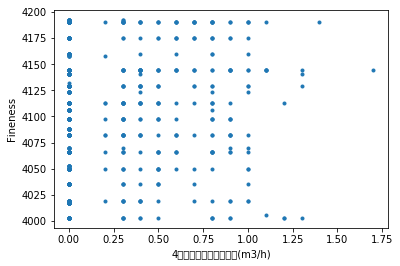

there are 4線選粉機轉速(rmp)


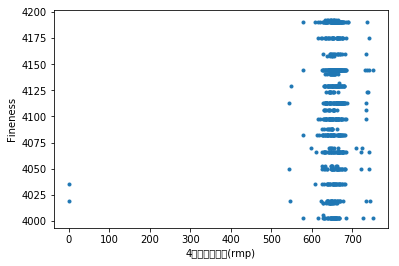

there are 4線-大風車入口閥開度


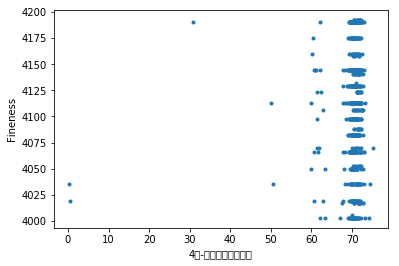

there are 4線磨機出口負壓(mmAq)


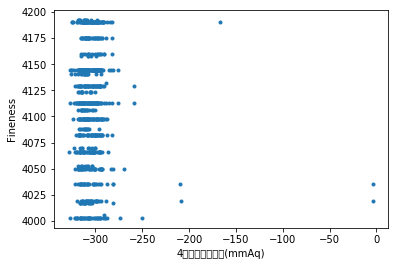

In [9]:
# It helps to drop outliers for relevant features 
for i in numeric_data:
    print(f"there are {i}")
    plt.plot(df_data[i], df_data.Fineness, '.' )
    plt.xlabel(i)
    plt.ylabel('Fineness')
    plt.show()

## Scatter_matrix

In [5]:
df_data = df_data.drop( labels = df_data[ df_data['4線磨機磨輪加壓壓力(kg/cm2)'] < 60 ].index, axis = 0 )
df_data = df_data.drop( labels = df_data[ df_data['4線選粉機轉速(rmp)'] < 450 ].index, axis = 0 )
df_data = df_data.drop( labels = df_data[ df_data['4線-大風車入口閥開度'] < 50 ].index, axis = 0 )
df_data = df_data.drop( labels = df_data[ df_data['4線磨機出口負壓(mmAq)'] > -150 ].index, axis = 0 )

C:\Users\06006637\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\06006637\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=4200.0, right=4200.0
  'left=%s, right=%s') % (left, right))
C:\Users\06006637\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=4200.0, top=4200.0
  'bottom=%s, top=%s') % (bottom, top))
C:\Users\06006637\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_misc.py:123: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[

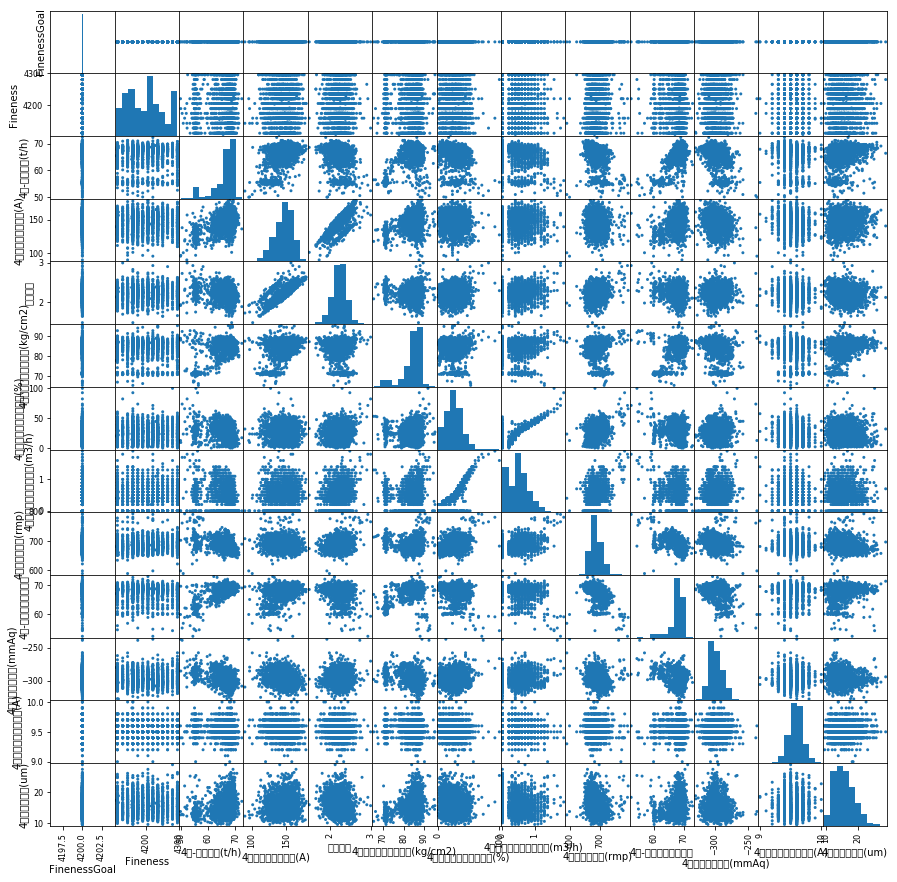

In [11]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(15,15))
scatter_matrix(df_data, alpha=1, ax=ax)
plt.savefig('scatter_matrix.png')

In [4]:
# 描述data物件型態的統計資訊（個數、種類、出現頻率最高的種類及其次數）
# print(f"categorical features: {df_train.describe(include='O').shape}")
df_train.describe(include="O")

NameError: name 'df_train' is not defined

In [ ]:
# #dump too many NAs (由data數量判斷出以下feature具有大量缺值，故將這些feature drop掉)
# df_train = df_train.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1)
# df_test = df_test.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis = 1)

In [7]:
#檢查是否有正確drop掉不需要之feature
# print(f"categorical features: {df_train.describe(include='O').shape}")
# df_train.describe(include="O")

categorical features: (4, 38)


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


## 關係矩陣

In [5]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,X6,X7,X8,Fineness
X6,1,0.313641,-0.223948,0.473739
X7,0.313641,1,-0.760226,0.800561
X8,-0.223948,-0.760226,1,-0.821988
Fineness,0.473739,0.800561,-0.821988,1


## EDA (Drop Outlier丟棄離群值)

In [7]:
df_train.shape

(2890, 8)

Text(0,0.5,'Fineness')

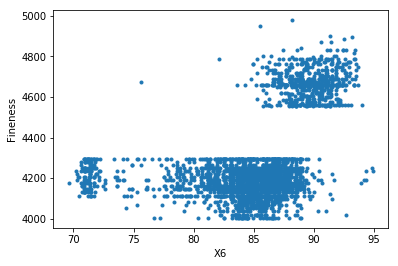

In [8]:
# It helps to drop outliers for relevant features 
plt.plot(df_train.X6, df_train.Fineness, '.' )
plt.xlabel('X6')
plt.ylabel('Fineness')
# print( df_train[ df_train.x2 > 60 ].Fineness )

In [7]:
# drop掉離群值
df_train = df_train.drop( labels = df_train[ df_train.X6 > 95 ].index, axis = 0 )
df_train = df_train.drop( labels = df_train[ df_train.X6 < 69 ].index, axis = 0 )
df_train = df_train.drop( labels = df_train[ df_train.Fineness < 2000 ].index, axis = 0 )
print( df_train[ df_train.Fineness < 2000 ].Fineness )

Series([], Name: Fineness, dtype: int64)


Text(0,0.5,'Fineness')

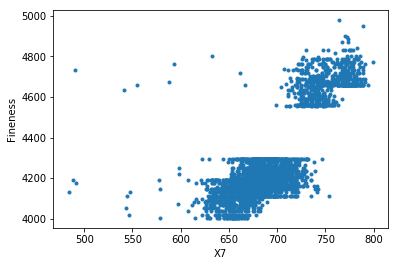

In [5]:
# It helps to drop outliers for relevant features 
plt.plot(df_train.X7, df_train.Fineness, '.' )
plt.xlabel('X7')
plt.ylabel('Fineness')
# print( df_train[ df_train.x2 > 60 ].Fineness )

In [12]:
# drop掉離群值
df_train = df_train.drop( labels = df_train[ df_train.X7 < 600 ].index, axis = 0 )

Text(0,0.5,'Fineness')

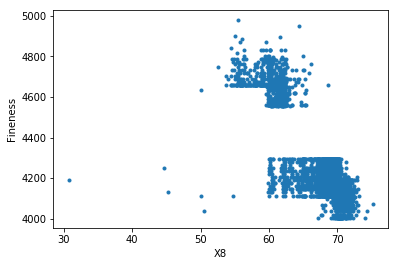

In [6]:
# It helps to drop outliers for relevant features 
plt.plot(df_train.X8, df_train.Fineness, '.' )
plt.xlabel('X8')
plt.ylabel('Fineness')
# print( df_train[ df_train.x2 > 60 ].Fineness )

In [15]:
# drop掉離群值
df_train = df_train.drop( labels = df_train[ df_train.X8 < 52 ].index, axis = 0 )

In [17]:
# # It helps to drop outliers for relevant features 
# plt.plot(df_train.X3, df_train.Fineness, '.' )
# plt.xlabel('X3')
# plt.ylabel('Fineness')

Text(0,0.5,'Fineness')

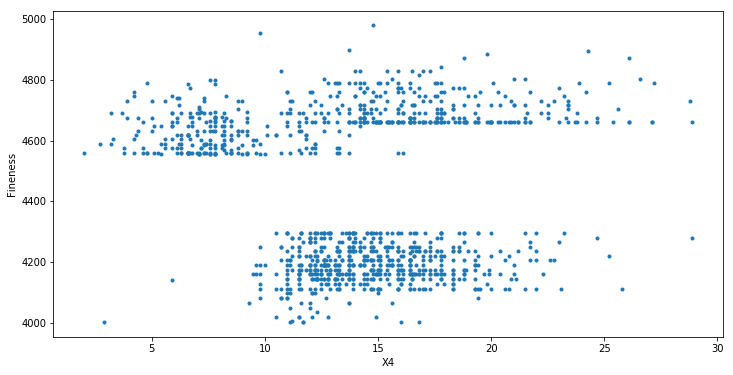

In [38]:
# plt.plot(df_train.X4, df_train.Fineness, '.' )
# plt.xlabel('X4')
# plt.ylabel('Fineness')

Text(0,0.5,'Fineness')

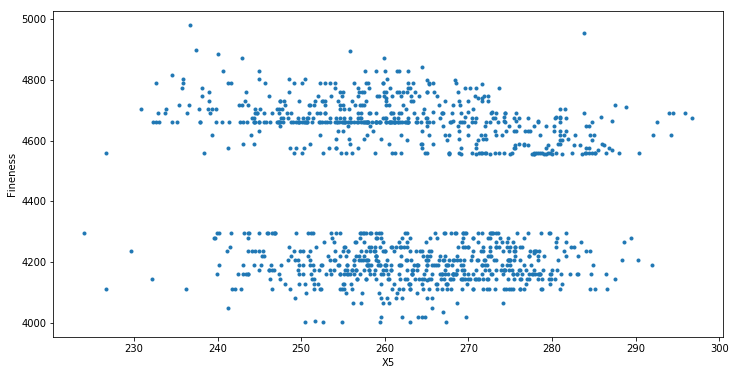

In [39]:
# plt.plot(df_train.X5, df_train.Fineness, '.' )
# plt.xlabel('X5')
# plt.ylabel('Fineness')
# # print( df_train[ df_train.x2 > 60 ].Fineness )

In [36]:
# # drop掉離群值
# df_train = df_train.drop( labels = df_train[ df_train.X3 < 1 ].index, axis = 0 )
# df_train = df_train.drop( labels = df_train[ df_train.X4 > 30 ].index, axis = 0 )
# df_train = df_train.drop( labels = df_train[ df_train.X5 < 220 ].index, axis = 0 )

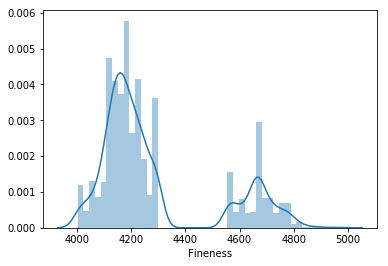

In [18]:
sns.distplot(df_train.Fineness)

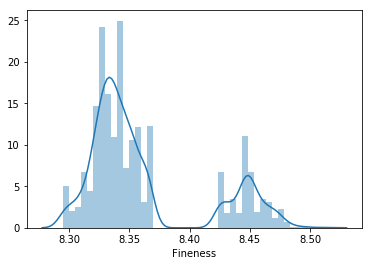

In [15]:
# 一些右偏分佈的 feature，可透過取 log 將其轉為常態分佈
sns.distplot(np.log(df_train.Fineness))

## 將數值型feature的NA值移除、計算NA值數量、sketch pics

In [19]:
# 取得數值型態的欄位
numeric_data = df_train._get_numeric_data()
numeric_data.columns

Index(['X6', 'X7', 'X8', 'Fineness'], dtype='object')

In [56]:
# drop掉每個欄位的NA值並劃出其分布
#  for i in numeric_data:
#     temp = df_train[i].dropna()  ##df_train[i].dropna()會將i欄位底下之Na值drop掉
#     print(f"there are {df_train[i].shape[0] - temp.shape[0]} NaN in {i}")
#     sns.distplot(temp) 
#     plt.show()

IndentationError: unexpected indent (<ipython-input-56-845772294473>, line 2)

## Drop Null Feature(s)將具有大量缺值的feature drop掉

In [ ]:
##建立一個train與test data的ID、SalePrice欄位移走後，合併之data Frame
# df_all = pd.concat( [ df_train.drop( [ 'Time', 'AS105ST_Aceto' ], axis = 1 ),
#                       df_test.drop( [ 'Time' ], axis = 1 ) ],
#                       axis = 0, ignore_index = False )

In [20]:
df_all=pd.concat( [df_train.drop( [ 'time_datetime', 'Fineness' ], axis = 1 ),
                   df_test.drop( [ 'time_datetime' ], axis = 1 ) ],
                      axis = 0, ignore_index = False )

In [21]:
# check null status
print(df_all.shape)

# #找出缺值的data
# df_na = df_all.select_dtypes( exclude = [ 'object' ] ).isnull().sum()  
# print( df_na[df_na>100].sort_values(ascending=False) )

(3161, 3)


In [22]:
# train = pd.read_csv("train.csv")
np.isnan(df_all).any()

X6    False
X7    False
X8    False
dtype: bool

In [20]:
# drop掉大多為Null的欄位
# df_all = df_all.drop(['LotFrontage'], axis = 1) # for 486 null values (train + test)
# print( df_all.shape )

(2917, 73)


## Numerical to Categorical(將數值feature轉為類別型feature)

In [22]:
# df_train[['OverallCond', 'SalePrice']].groupby(['OverallCond']).agg({'SalePrice':'median', 'OverallCond':'count'}).sort_values(by='SalePrice', ascending=False)
# 將資料根據 MSSubClass進行分組，並將各組中SalePrice的中位數，與各組總數目列出。>>> ascending若為False，SalePrice由大排至小
# df_train[['MSSubClass','SalePrice']].groupby(['MSSubClass']).agg({'SalePrice':'median', 'MSSubClass':'count'}).sort_values(by='SalePrice', ascending=False)

,SalePrice,MSSubClass
MSSubClass,,
60,216000,297
120,192000,87
80,166500,58
75,163500,16
20,159250,536
70,156000,60
160,146000,63
40,142500,4
85,140750,20


In [23]:
# It helps to transform some numerical features to categorical
# df_all.MSSubClass = df_all.MSSubClass.astype( str )
# df_all.OverallCond = df_all.OverallCond.astype( str )
# df_all.YrSold = df_all.YrSold.astype( str )
# df_all.MoSold = df_all.MoSold.astype( str )

In [24]:
# handle skewness
# df_train.SalePrice = np.log( df_train.SalePrice )

# num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
# # na drop should be done series by series
# skewed_feats = df_train[ num_feats ].apply( func = lambda s: skew(s.dropna()), axis = 0 )
# print(skewed_feats)
# skewed_feats = skewed_feats[ skewed_feats > 0.75 ].index
# # print(skewed_feats)
# df_all[ skewed_feats ] = np.log1p( df_all[ skewed_feats ] )

LotArea          12.560986
OverallQual       0.200579
YearBuilt        -0.611665
YearRemodAdd     -0.501322
MasVnrArea        2.685003
BsmtFinSF1        0.764002
BsmtFinSF2        4.247550
BsmtUnfSF         0.919955
TotalBsmtSF       0.511177
1stFlrSF          0.886723
2ndFlrSF          0.812121
LowQualFinSF      8.995688
GrLivArea         1.009951
BsmtFullBath      0.589751
BsmtHalfBath      4.095895
FullBath          0.031239
HalfBath          0.679351
BedroomAbvGr      0.212107
KitchenAbvGr      4.480268
TotRmsAbvGrd      0.659822
Fireplaces        0.631409
GarageCars       -0.342025
GarageArea        0.131612
WoodDeckSF        1.544214
OpenPorchSF       2.337421
EnclosedPorch     3.083987
3SsnPorch        10.286510
ScreenPorch       4.114690
PoolArea         15.932532
MiscVal          24.434913
dtype: float64


In [11]:
# df_all.describe(include = "O")

ValueError: No objects to concatenate

## One-Hot Encoding

In [26]:
# df_all_dum = pd.get_dummies(df_all); #會自動將str型別的feature進行one-hot Encoding，數值型別的feature則無動作
# df_all_dum.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,2003,2003,5.283204,6.561031,0.0,5.017280,856.0,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,9.169623,6,1976,1976,0.000000,6.886532,0.0,5.652489,1262.0,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,9.328212,7,2001,2002,5.093750,6.188264,0.0,6.075346,920.0,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,9.164401,7,1915,1970,0.000000,5.379897,0.0,6.293419,756.0,6.869014,...,0,0,0,1,1,0,0,0,0,0
4,9.565284,8,2000,2000,5.860786,6.486161,0.0,6.196444,1145.0,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [27]:
# 將NA的值填平均值
# df_all_dum = df_all_dum.fillna( df_all_dum.mean() ); df_all_dum.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,9.042040,7,2003,2003,5.283204,6.561031,0.0,5.017280,856.0,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,9.169623,6,1976,1976,0.000000,6.886532,0.0,5.652489,1262.0,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,9.328212,7,2001,2002,5.093750,6.188264,0.0,6.075346,920.0,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,9.164401,7,1915,1970,0.000000,5.379897,0.0,6.293419,756.0,6.869014,...,0,0,0,1,1,0,0,0,0,0
4,9.565284,8,2000,2000,5.860786,6.486161,0.0,6.196444,1145.0,7.044033,...,0,0,0,1,0,0,0,0,1,0


## Standardization (對所有數值型DATA)

In [23]:
# normalization helps a bit  將所有數值型data都做 Normalization
num_feats = df_all.select_dtypes( exclude = [ 'object' ] ).columns
from sklearn import preprocessing
df_all[ num_feats ] = preprocessing.scale( df_all[ num_feats ] )
df_all[ num_feats ].head()

,X6,X7,X8
0,-0.153947,-0.759771,0.266953
1,-0.200060,-0.735781,0.266953
2,-0.453680,-0.719787,0.242922
3,-0.292285,-0.711791,0.339045
4,0.330236,-0.120032,0.315015


## Training Start

In [24]:
# inputs
from sklearn.model_selection import train_test_split
X = df_all[ :df_train.shape[0]]
y = df_train.Fineness

X, X_val, y, y_val = train_test_split(X, y, test_size = 0.1, random_state = 10)

X_test = df_all[ df_train.shape[0]: ]

In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits = 5, random_state = None, shuffle = True)
pred_tmp = np.zeros((X_test.shape[0],1)).reshape(-1)
# print(list(kf.split(X)))
##for train_index, val_index in kf.split(X):
#     print('train_index:', train_index)
#     print('val_index:', val_index)
##    X_train = pd.DataFrame(data = X.values[train_index], columns = X.columns, index = train_index)
##    X_val = pd.DataFrame(data = X.values[val_index], columns = X.columns, index = val_index)
#     y_train = pd.DataFrame(data = y.values[train_index], columns = ['SalePrice_N'], index = train_index)
##    y_train = y.values[ train_index ]
##    y_val = pd.DataFrame(data = y.values[val_index], columns = ['SalePrice'], index = val_index)
    
##    model_XGB = XGBRegressor()
##    model_XGB.fit(X_train, y_train)
##    y_pred = model_XGB.predict(X_val)
##    y_ans = model_XGB.predict(X_test)
#     print(y_ans.shape)
##    pred_tmp+=np.exp(y_ans)
##    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))
##    print('  R2:', metrics.r2_score(y_val, y_pred))
##y_answer_XGB = pred_tmp/5

In [26]:
##使用訓練集資料X進行預測之分數
model_XGB = XGBRegressor()
model_XGB.fit(X, y)
y_pred = model_XGB.predict( X )
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('  R2:', metrics.r2_score(y, y_pred))

[13:45:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 62.15952834810532
  R2: 0.9178202247603071


In [27]:
##使用驗證集資料X_val進行預測之分數
val_preds = model_XGB.predict(X_val)

print('RMSE:', np.sqrt(metrics.mean_squared_error( y_val, val_preds ) ) )
print('  R2:', metrics.r2_score( y_val, val_preds ) )

RMSE: 72.57595301415721
  R2: 0.8965355512260557


In [28]:
##使用test資料進行預測了
y_answer_XGB = model_XGB.predict( X_test )
# y_answer_XGB = np.exp(y_answer_XGB) 
print(pd.DataFrame({'Fineness': y_answer_XGB}, index=df_test.time_datetime).head())

                        Fineness
time_datetime                   
2019-12-30 01:30:00  4203.908691
2019-12-30 03:30:00  4197.925781
2019-12-30 05:30:00  4181.730957
2019-12-30 07:30:00  4174.756348
2019-12-30 09:30:00  4178.152832


In [29]:
pd.DataFrame({'Fineness(Predicition)': y_answer_XGB}, index=df_test.time_datetime).to_csv('Prediction_XGboost.csv')